In [32]:
# Imports
import warnings
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import statsmodels.api as sm
import matplotlib
import plotly
import matplotlib.pyplot as plt
import plotly.offline as pyoff
import plotly.graph_objs as go
from matplotlib.ticker import MaxNLocator
from datetime import datetime, timedelta
%matplotlib inline
pyoff.init_notebook_mode()
warnings.simplefilter("ignore")

#### 1. Análise dos dados

In [2]:
df = pd.read_csv('..\data\Vendas.csv')
df['DATA_VENDA'] = pd.to_datetime(df['DATA_VENDA'], dayfirst=True)
df

DATA_VENDA  NROEMPRESA UNIDADE  CATEGORIA_1  CATEGORIA_2  \
0        2017-01-01         353      DF          NaN          NaN   
1        2017-01-01         353      DF          NaN          NaN   
2        2017-01-01         353      DF          NaN          NaN   
3        2017-01-01         353      DF          NaN          NaN   
4        2017-01-01         353      DF          NaN          NaN   
...             ...         ...     ...          ...          ...   
13660096 2017-12-31         171      SP          NaN          NaN   
13660097 2017-12-31         171      SP     2.704608          NaN   
13660098 2017-12-31         171      SP     2.686952          NaN   
13660099 2017-12-31         171      SP     2.710764          NaN   
13660100 2017-12-31         171      SP     2.673284          NaN   

          CATEGORIA_3  CATEGORIA_4  CATEGORIA_5  CATEGORIA_6  CATEGORIA_7  \
0                 NaN          NaN          NaN          NaN     2.912631   
1                 NaN          NaN          NaN          NaN     2.907537   
2                 NaN          NaN          NaN          NaN     2.912631   
3                 NaN          NaN          NaN          NaN     2.907537   
4                 NaN          NaN          NaN          NaN     2.939494   
...               ...          ...          ...          ...          ...   
13660096          NaN          NaN          NaN          NaN     2.916305   
13660097          NaN          NaN          NaN          NaN          NaN   
13660098          NaN          NaN          NaN          NaN     2.888511   
13660099          NaN          NaN          NaN          NaN          NaN   
13660100          NaN          NaN          NaN          NaN          NaN   

          CATEGORIA_8  
0                 NaN  
1                 NaN  
2                 NaN  
3                 NaN  
4                 NaN  
...               ...  
13660096          NaN  
13660097          NaN  
13660098          NaN  
13660099          NaN  
13660100          NaN  

[13660101 rows x 11 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13660101 entries, 0 to 13660100
Data columns (total 11 columns):
 #   Column       Dtype         
---  ------       -----         
 0   DATA_VENDA   datetime64[ns]
 1   NROEMPRESA   int64         
 2   UNIDADE      object        
 3   CATEGORIA_1  float64       
 4   CATEGORIA_2  float64       
 5   CATEGORIA_3  float64       
 6   CATEGORIA_4  float64       
 7   CATEGORIA_5  float64       
 8   CATEGORIA_6  float64       
 9   CATEGORIA_7  float64       
 10  CATEGORIA_8  float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 1.1+ GB


In [4]:
df.isna().any()

DATA_VENDA     False
NROEMPRESA     False
UNIDADE        False
CATEGORIA_1     True
CATEGORIA_2     True
CATEGORIA_3     True
CATEGORIA_4     True
CATEGORIA_5     True
CATEGORIA_6     True
CATEGORIA_7     True
CATEGORIA_8     True
dtype: bool

In [5]:
df.isna().sum()

DATA_VENDA            0
NROEMPRESA            0
UNIDADE               0
CATEGORIA_1     2755030
CATEGORIA_2    10818030
CATEGORIA_3    13217524
CATEGORIA_4    12865685
CATEGORIA_5    10476453
CATEGORIA_6    10773916
CATEGORIA_7     7528847
CATEGORIA_8    13303463
dtype: int64

Analisando os dados missing

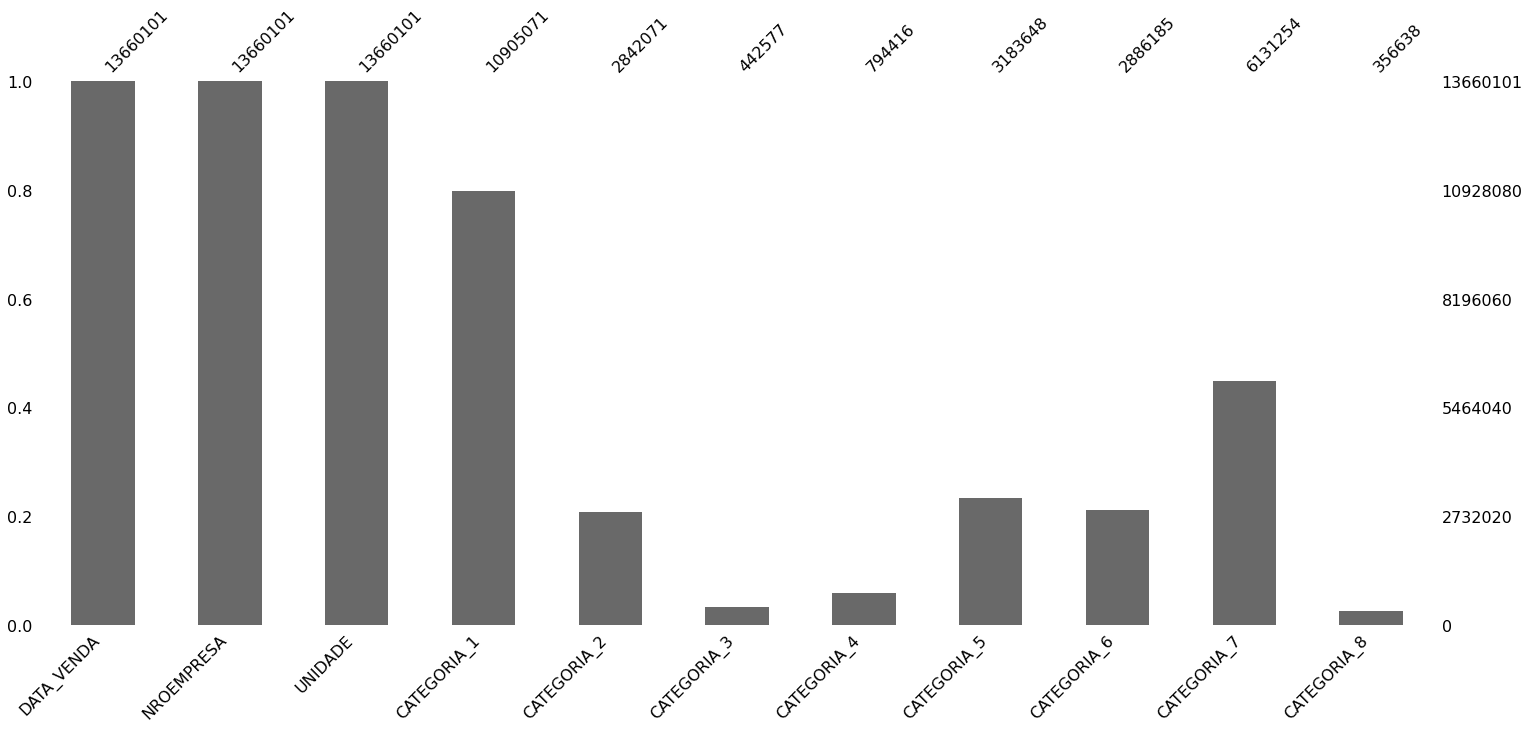

In [6]:
msno.bar(df);

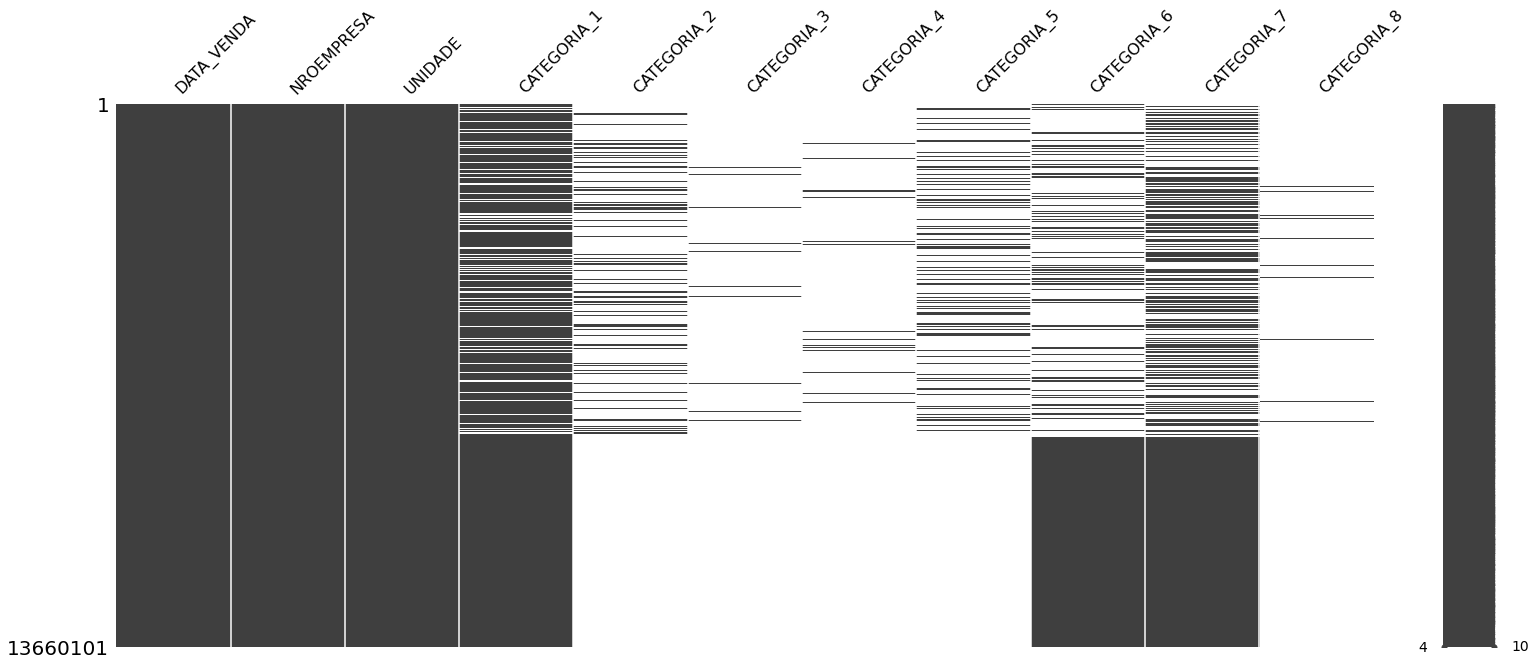

In [7]:
msno.matrix(df);

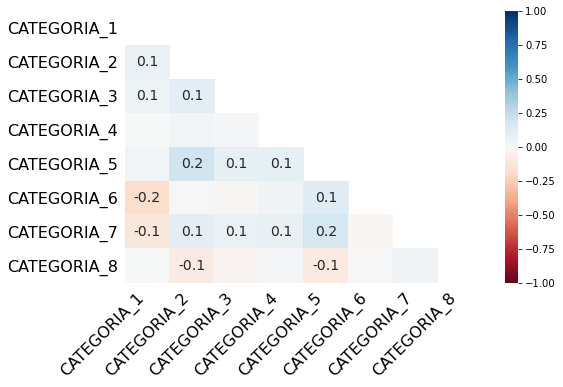

In [8]:
msno.heatmap(df, figsize=(8,5));

In [9]:
# Número de Empresa
len(df['NROEMPRESA'].unique())

40

##### Faturamento Mensal por categoria

In [10]:
df_aux = df.drop(['NROEMPRESA','UNIDADE'] , axis=1)
df_aux['Mês Venda'] = df_aux['DATA_VENDA'].apply(lambda x: str(x.month)+'-2017')

for col in df_aux.columns:
    if col not in ['Mês Venda','DATA_VENDA']:
        
        df_aux[col+' Faturamento/Mês'] = df_aux.groupby(['Mês Venda'])[[col]].transform('sum')
        df_aux.drop(col, axis=1, inplace=True)

df_aux = df_aux.set_index('DATA_VENDA').to_period('M').sort_index()
df_aux.drop_duplicates(inplace=True)
df_aux

Mês Venda  CATEGORIA_1 Faturamento/Mês  \
DATA_VENDA                                          
2017-01       1-2017                 2.459012e+06   
2017-02       2-2017                 2.561464e+06   
2017-03       3-2017                 2.670848e+06   
2017-04       4-2017                 2.690680e+06   
2017-05       5-2017                 2.490666e+06   
2017-06       6-2017                 2.637878e+06   
2017-07       7-2017                 2.554999e+06   
2017-08       8-2017                 2.794337e+06   
2017-09       9-2017                 3.008331e+06   
2017-10      10-2017                 2.907534e+06   
2017-11      11-2017                 2.748836e+06   
2017-12      12-2017                 2.712862e+06   

            CATEGORIA_2 Faturamento/Mês  CATEGORIA_3 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   681024.057729                102917.420443   
2017-02                   614411.992504                 85094.539444   
2017-03                   719416.119809                122018.809283   
2017-04                   604898.899823                105953.740069   
2017-05                   716661.217788                 87605.326056   
2017-06                   633764.340385                 85313.935616   
2017-07                   679095.840482                 86287.292636   
2017-08                   755178.993680                118149.239409   
2017-09                   609040.058844                109426.950944   
2017-10                   790754.445361                133143.151457   
2017-11                   706484.271411                110379.805691   
2017-12                   719990.711487                112507.069054   

            CATEGORIA_4 Faturamento/Mês  CATEGORIA_5 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   142202.953886                711659.290532   
2017-02                   158859.225555                674541.472399   
2017-03                   160836.516604                786554.711561   
2017-04                   154347.541138                813248.667991   
2017-05                   200121.738419                823207.510342   
2017-06                   181195.194753                743426.106110   
2017-07                   231769.076716                828880.081505   
2017-08                   255467.021160                880859.223695   
2017-09                   188943.642734                778591.249210   
2017-10                   223093.114256                861270.075340   
2017-11                   199295.268652                737670.472622   
2017-12                   163723.705297                875689.506900   

            CATEGORIA_6 Faturamento/Mês  CATEGORIA_7 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   594478.019242                 1.384545e+06   
2017-02                   597485.653885                 1.453495e+06   
2017-03                   647282.801095                 1.595309e+06   
2017-04                   708421.418086                 1.504903e+06   
2017-05                   762219.900067                 1.505591e+06   
2017-06                   770802.931606                 1.496429e+06   
2017-07                   733154.109434                 1.623534e+06   
2017-08                   768692.089160                 1.587032e+06   
2017-09                   679030.078056                 1.493314e+06   
2017-10                   700653.934952                 1.599890e+06   
2017-11                   697223.690920                 1.495607e+06   
2017-12                   683549.235407                 1.573468e+06   

            CATEGORIA_8 Faturamento/Mês  
DATA_VENDA                               
2017-01                    73633.012048  
2017-02                    85356.651290  
2017-03                    84710.828294  
2017-04                    8771

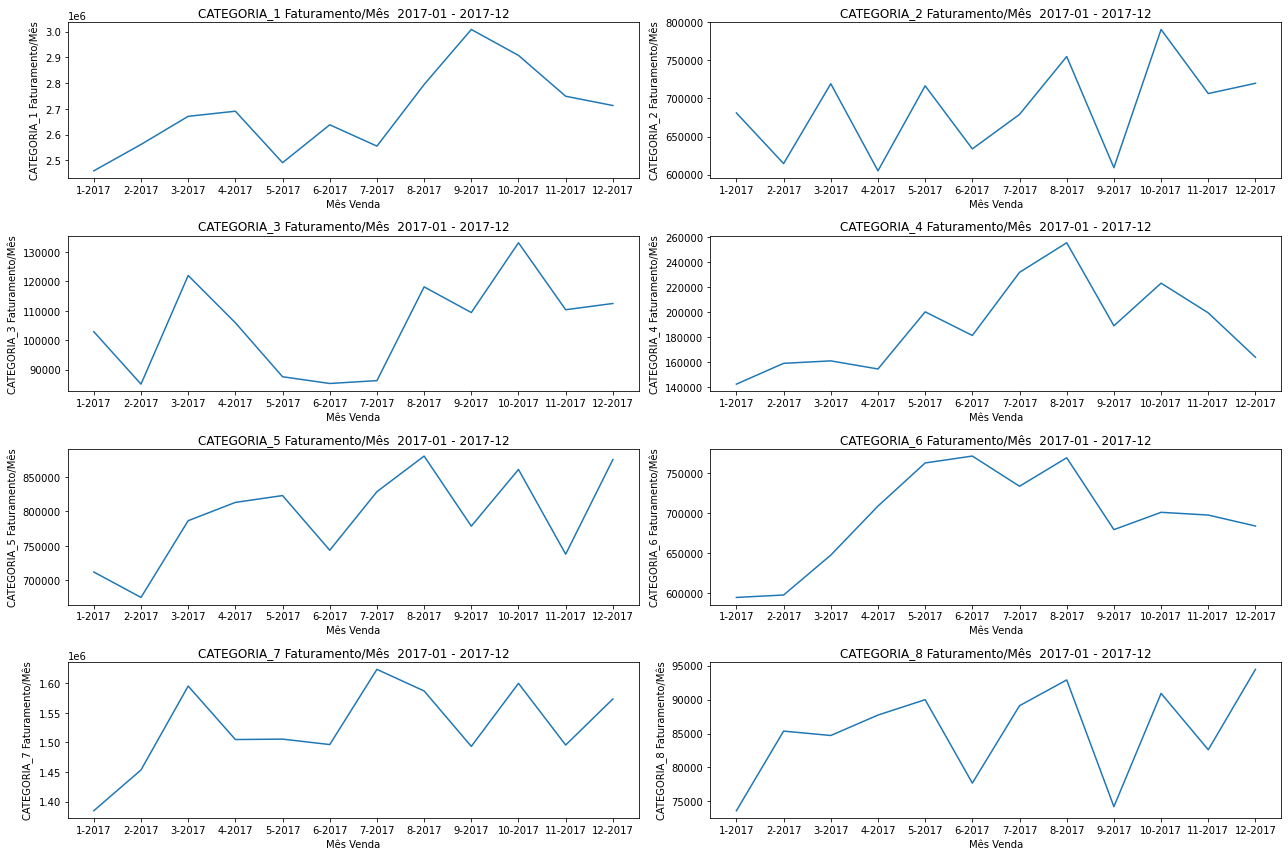

In [11]:
# Gráficos da evolução dos faturamentos mensais

# Definindo o tamanho do gráfico
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(18)

for i, col in enumerate(df_aux.columns):
    if col != 'Mês Venda':   
        
        plt.subplot(4,2,i)
        plt.plot(df_aux['Mês Venda'], 
                 df_aux[col].values)
        
        plt.title(col+'  2017-01 - 2017-12')
        plt.xlabel('Mês Venda')
        plt.ylabel(col)
        
fig.tight_layout()
plt.show()

##### Taxa Percentual de Crescimento Mensal por categoria (Faturamento Mensal / Faturamento Mês Anterior)

In [12]:
for i in df_aux.columns:
    if i != 'Mês Venda':
        df_aux['CrescimentoMensal'+i[10]] = df_aux[i].pct_change()
        
df_aux

Mês Venda  CATEGORIA_1 Faturamento/Mês  \
DATA_VENDA                                          
2017-01       1-2017                 2.459012e+06   
2017-02       2-2017                 2.561464e+06   
2017-03       3-2017                 2.670848e+06   
2017-04       4-2017                 2.690680e+06   
2017-05       5-2017                 2.490666e+06   
2017-06       6-2017                 2.637878e+06   
2017-07       7-2017                 2.554999e+06   
2017-08       8-2017                 2.794337e+06   
2017-09       9-2017                 3.008331e+06   
2017-10      10-2017                 2.907534e+06   
2017-11      11-2017                 2.748836e+06   
2017-12      12-2017                 2.712862e+06   

            CATEGORIA_2 Faturamento/Mês  CATEGORIA_3 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   681024.057729                102917.420443   
2017-02                   614411.992504                 85094.539444   
2017-03                   719416.119809                122018.809283   
2017-04                   604898.899823                105953.740069   
2017-05                   716661.217788                 87605.326056   
2017-06                   633764.340385                 85313.935616   
2017-07                   679095.840482                 86287.292636   
2017-08                   755178.993680                118149.239409   
2017-09                   609040.058844                109426.950944   
2017-10                   790754.445361                133143.151457   
2017-11                   706484.271411                110379.805691   
2017-12                   719990.711487                112507.069054   

            CATEGORIA_4 Faturamento/Mês  CATEGORIA_5 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   142202.953886                711659.290532   
2017-02                   158859.225555                674541.472399   
2017-03                   160836.516604                786554.711561   
2017-04                   154347.541138                813248.667991   
2017-05                   200121.738419                823207.510342   
2017-06                   181195.194753                743426.106110   
2017-07                   231769.076716                828880.081505   
2017-08                   255467.021160                880859.223695   
2017-09                   188943.642734                778591.249210   
2017-10                   223093.114256                861270.075340   
2017-11                   199295.268652                737670.472622   
2017-12                   163723.705297                875689.506900   

            CATEGORIA_6 Faturamento/Mês  CATEGORIA_7 Faturamento/Mês  \
DATA_VENDA                                                             
2017-01                   594478.019242                 1.384545e+06   
2017-02                   597485.653885                 1.453495e+06   
2017-03                   647282.801095                 1.595309e+06   
2017-04                   708421.418086                 1.504903e+06   
2017-05                   762219.900067                 1.505591e+06   
2017-06                   770802.931606                 1.496429e+06   
2017-07                   733154.109434                 1.623534e+06   
2017-08                   768692.089160                 1.587032e+06   
2017-09                   679030.078056                 1.493314e+06   
2017-10                   700653.934952                 1.599890e+06   
2017-11                   697223.690920                 1.495607e+06   
2017-12                   683549.235407                 1.573468e+06   

            CATEGORIA_8 Faturamento/Mês  CrescimentoMensal1  \
DATA_VENDA                                                    
2017-01                    73633.012048                 NaN   
2017-02                    85356.651290            0

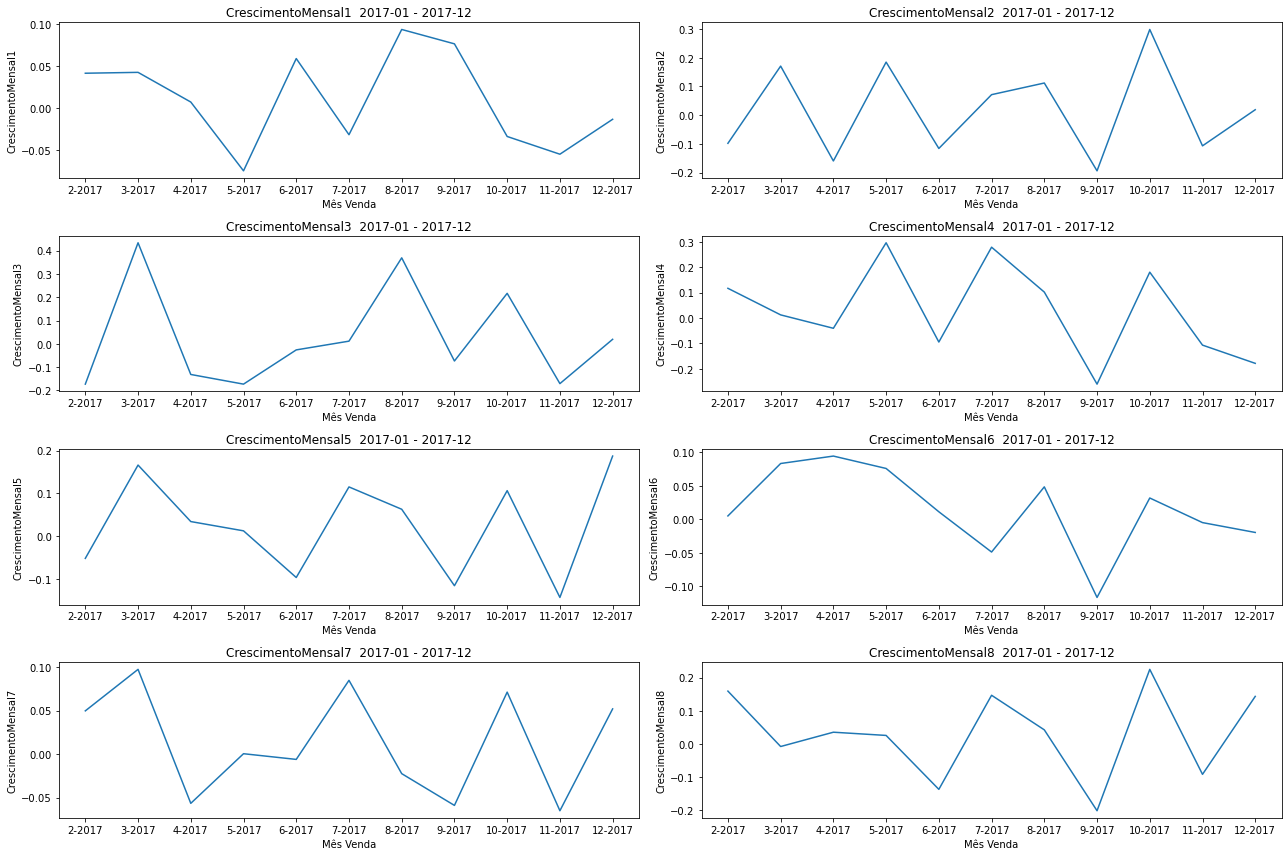

In [13]:
# Gráficos da evolução da Taxa Percentual de Crescimento Mensal

# Definindo o tamanho do gráfico
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(18)

for i, col in enumerate(df_aux.columns):
    if 'CrescimentoMensal'in col:   
        
        plt.subplot(4,2,i-8)
        plt.plot(df_aux['Mês Venda'], 
                 df_aux[col].values)
        
        plt.title(col+'  2017-01 - 2017-12')
        plt.xlabel('Mês Venda')
        plt.ylabel(col)
        fig.tight_layout()

plt.show()

##### Número de Vendas por Empresa

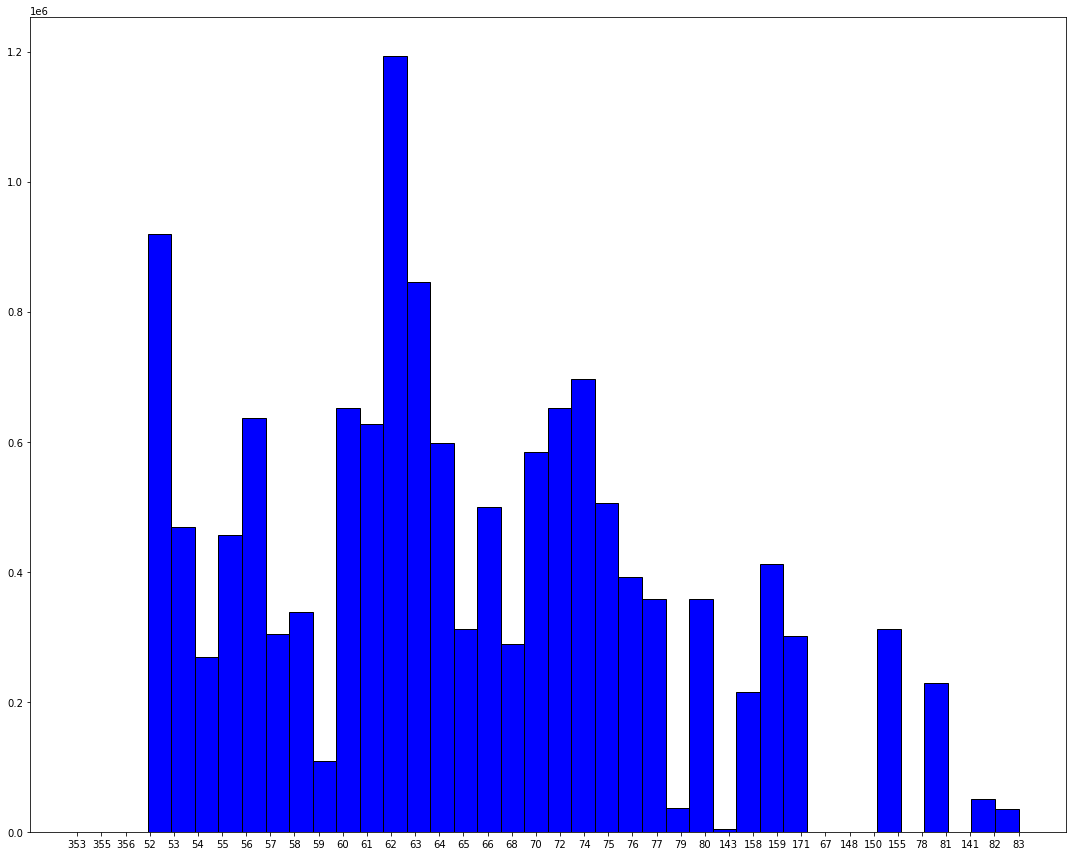

In [14]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

df['NROEMPRESA'] = df['NROEMPRESA'].astype(str)
plt.hist(df['NROEMPRESA'], color = 'blue', edgecolor = 'black', bins = int(40))
fig.tight_layout();

##### Número de Vendas por Empresa

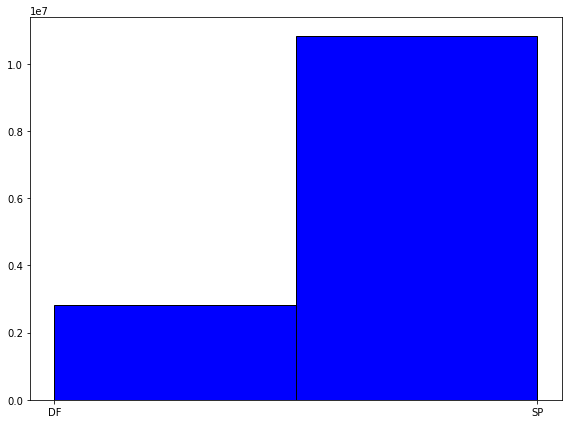

In [15]:
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(8)

plt.hist(df['UNIDADE'], color = 'blue', edgecolor = 'black', bins = int(2))
fig.tight_layout();

##### Faturamento por Empresa

In [16]:
df['Faturamento total'] = df.iloc[:,-4:-1].sum(axis=1)
df.head()

DATA_VENDA NROEMPRESA UNIDADE  CATEGORIA_1  CATEGORIA_2  CATEGORIA_3  \
0 2017-01-01        353      DF          NaN          NaN          NaN   
1 2017-01-01        353      DF          NaN          NaN          NaN   
2 2017-01-01        353      DF          NaN          NaN          NaN   
3 2017-01-01        353      DF          NaN          NaN          NaN   
4 2017-01-01        353      DF          NaN          NaN          NaN   

   CATEGORIA_4  CATEGORIA_5  CATEGORIA_6  CATEGORIA_7  CATEGORIA_8  \
0          NaN          NaN          NaN     2.912631          NaN   
1          NaN          NaN          NaN     2.907537          NaN   
2          NaN          NaN          NaN     2.912631          NaN   
3          NaN          NaN          NaN     2.907537          NaN   
4          NaN          NaN          NaN     2.939494          NaN   

   Faturamento total  
0           2.912631  
1           2.907537  
2           2.912631  
3           2.907537  
4           2.939494

In [17]:
df_fat_emp = df[['NROEMPRESA','Faturamento total']]
df_fat_emp['NROEMPRESA'] = df_fat_emp['NROEMPRESA'].astype(str)
df_fat_emp['Faturamento total'] = df_fat_emp.groupby(['NROEMPRESA'])['Faturamento total'].transform('sum')
df_fat_emp.drop_duplicates(inplace=True)

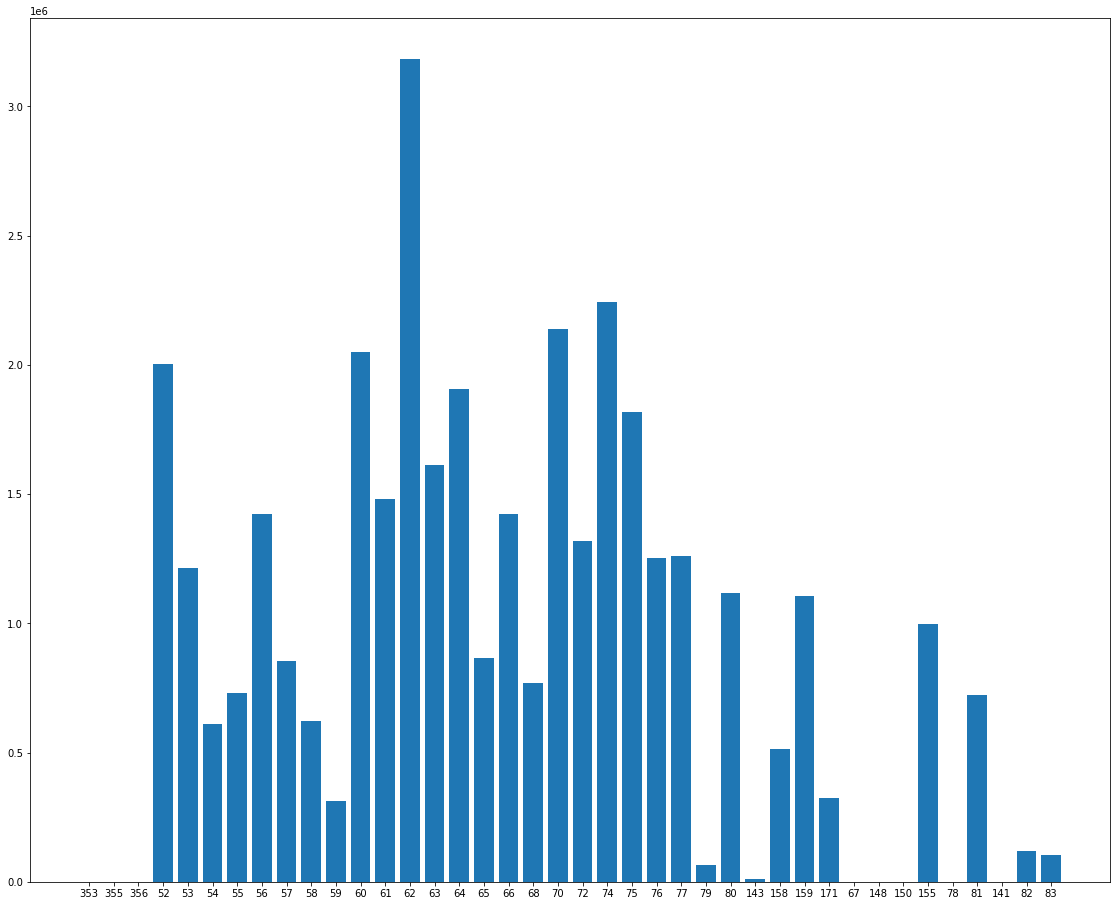

In [18]:
fig = plt.figure()
fig.set_figheight(12)
fig.set_figwidth(15)

ax = fig.add_axes([0,0,1,1])
n_emp = list(df_fat_emp['NROEMPRESA'])
fat = list(df_fat_emp['Faturamento total'])
ax.bar(n_emp, fat);

##### Elasticidade dos Produtos

In [26]:
#Preparação dos dados
df_list = list()

for col in df.columns:
    if col not in ['DATA_VENDA', 'NROEMPRESA', 'UNIDADE', 'Faturamento total']:
    
        df_cat = df[['DATA_VENDA', col]]

        df_cat['categoria'+ col[-1]] = 'cat'+col[-1]
        
        df_cat = df_cat[df_cat[col] == df_cat[col]]
        
        df_cat['Sales_count_day_cat'+col[-1]] = df_cat.groupby('DATA_VENDA')['categoria'+ col[-1]].transform('count')
        
        df_cat['Mean_Price_cat'+col[-1]] = df_cat.groupby('DATA_VENDA')[col].transform('mean')
        
        df_cat.drop([col, 'categoria'+ col[-1]], inplace=True, axis=1)
        
        df_cat.drop_duplicates(inplace=True)
        
        df_list.append(df_cat)
        
df_elas = pd.concat(df_list)
df_elas

DATA_VENDA  Sales_count_day_cat1  Mean_Price_cat1  \
31       2017-01-02               30894.0         2.890115   
36484    2017-01-03               31190.0         2.886238   
73323    2017-01-04               28949.0         2.863170   
108182   2017-01-05               27547.0         2.862375   
141848   2017-01-06               26826.0         2.861414   
...             ...                   ...              ...   
13448513 2017-12-27                   NaN              NaN   
13485104 2017-12-28                   NaN              NaN   
13521348 2017-12-29                   NaN              NaN   
13561715 2017-12-30                   NaN              NaN   
13614429 2017-12-31                   NaN              NaN   

          Sales_count_day_cat2  Mean_Price_cat2  Sales_count_day_cat3  \
31                         NaN              NaN                   NaN   
36484                      NaN              NaN                   NaN   
73323                      NaN              NaN                   NaN   
108182                     NaN              NaN                   NaN   
141848                     NaN              NaN                   NaN   
...                        ...              ...                   ...   
13448513                   NaN              NaN                   NaN   
13485104                   NaN              NaN                   NaN   
13521348                   NaN              NaN                   NaN   
13561715                   NaN              NaN                   NaN   
13614429                   NaN              NaN                   NaN   

          Mean_Price_cat3  Sales_count_day_cat4  Mean_Price_cat4  \
31                    NaN                   NaN              NaN   
36484                 NaN                   NaN              NaN   
73323                 NaN                   NaN              NaN   
108182                NaN                   NaN              NaN   
141848                NaN                   NaN              NaN   
...                   ...                   ...              ...   
13448513              NaN                   NaN              NaN   
13485104              NaN                   NaN              NaN   
13521348              NaN                   NaN              NaN   
13561715              NaN                   NaN              NaN   
13614429              NaN                   NaN              NaN   

          Sales_count_day_cat5  Mean_Price_cat5  Sales_count_day_cat6  \
31                         NaN              NaN                   NaN   
36484                      NaN              NaN                   NaN   
73323                      NaN              NaN                   NaN   
108182                     NaN              NaN                   NaN   
141848                     NaN              NaN                   NaN   
...                        ...              ...                   ...   
13448513                   NaN              NaN                   NaN   
13485104                   NaN              NaN                   NaN   
13521348                   NaN              NaN                   NaN   
13561715                   NaN              NaN                   NaN   
13614429                   NaN              NaN                   NaN   

          Mean_Price_cat6  Sales_count_day_cat7  Mean_Price_cat7  \
31                    NaN                   NaN              NaN   
36484                 NaN                   NaN              NaN   
73323                 NaN                   NaN              NaN   
108182                NaN                   NaN              NaN   
141848                NaN                   NaN              NaN   
...                   ...                   ...              ...   
13448513              NaN                   NaN              NaN   
13485104              NaN                   NaN              NaN   
13521348              NaN                   NaN              NaN   
13561715     

In [38]:
x_cols = [x for x in df_elas.columns if 'Mean' in x]
x_cols.insert(0,'DATA_VENDA')
x_values = df_elas[x_cols]
x_values.reset_index(drop=True, inplace=True)

for col in x_values.columns[1:]:

    x_values.rename(columns={col:col[-4:]}, inplace=True)

x_values

DATA_VENDA      cat1  cat2  cat3  cat4  cat5  cat6  cat7      cat8
0    2017-01-02  2.890115   NaN   NaN   NaN   NaN   NaN   NaN       NaN
1    2017-01-03  2.886238   NaN   NaN   NaN   NaN   NaN   NaN       NaN
2    2017-01-04  2.863170   NaN   NaN   NaN   NaN   NaN   NaN       NaN
3    2017-01-05  2.862375   NaN   NaN   NaN   NaN   NaN   NaN       NaN
4    2017-01-06  2.861414   NaN   NaN   NaN   NaN   NaN   NaN       NaN
...         ...       ...   ...   ...   ...   ...   ...   ...       ...
2898 2017-12-27       NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.716857
2899 2017-12-28       NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.709774
2900 2017-12-29       NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.777868
2901 2017-12-30       NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.772723
2902 2017-12-31       NaN   NaN   NaN   NaN   NaN   NaN   NaN  3.756202

[2903 rows x 9 columns]

In [39]:
y_cols = [y for y in df_elas.columns if 'Sales' in y]
y_cols.insert(0,'DATA_VENDA')
y_values = df_elas[y_cols]
y_values.reset_index(drop=True, inplace=True)

for col in y_values.columns[1:]:

    y_values.rename(columns={col:col[-4:]}, inplace=True)

y_values

DATA_VENDA     cat1  cat2  cat3  cat4  cat5  cat6  cat7    cat8
0    2017-01-02  30894.0   NaN   NaN   NaN   NaN   NaN   NaN     NaN
1    2017-01-03  31190.0   NaN   NaN   NaN   NaN   NaN   NaN     NaN
2    2017-01-04  28949.0   NaN   NaN   NaN   NaN   NaN   NaN     NaN
3    2017-01-05  27547.0   NaN   NaN   NaN   NaN   NaN   NaN     NaN
4    2017-01-06  26826.0   NaN   NaN   NaN   NaN   NaN   NaN     NaN
...         ...      ...   ...   ...   ...   ...   ...   ...     ...
2898 2017-12-27      NaN   NaN   NaN   NaN   NaN   NaN   NaN   655.0
2899 2017-12-28      NaN   NaN   NaN   NaN   NaN   NaN   NaN   681.0
2900 2017-12-29      NaN   NaN   NaN   NaN   NaN   NaN   NaN   833.0
2901 2017-12-30      NaN   NaN   NaN   NaN   NaN   NaN   NaN  1291.0
2902 2017-12-31      NaN   NaN   NaN   NaN   NaN   NaN   NaN  1307.0

[2903 rows x 9 columns]

In [51]:
points = []
results_values = {
    "name": [],
    "price_elasticity": [],
    "price_mean": [],
    "quantity_mean": [],
    "intercept": [],
    "t_score":[],
    "slope": [],
    "coefficient_pvalue" : [],
    'rsquared':[]
}

for column in x_values.columns[1:]:
    column_points = []
    for i in range(len(x_values[column])):
        if not np.isnan(x_values[column][i]) and not np.isnan(y_values[column][i]):
            column_points.append((x_values[column][i], y_values[column][i]))
    df_el = pd.DataFrame(list(column_points), columns= ['x_value', 'y_value'])
    
    # Regressão Linear
    x_value = df_el['x_value']
    y_value = df_el['y_value']
    X = sm.add_constant(x_value)
    model = sm.OLS(y_value, X)
    result = model.fit()
    
 
    rsquared = result.rsquared
    coefficient_pvalue = result.f_pvalue
    intercept, slope = result.params
    mean_price = np.mean(x_value)
    mean_quantity = np.mean(y_value)
    tintercept, t_score = result.tvalues

    #Formula Elasticidade do preço
    price_elasticity = (slope)*(mean_price/mean_quantity)    

    #Adiciona os resultados no dicionário que formará o DataFrame
    results_values['rsquared'].append(rsquared)
    results_values["name"].append(column)
    results_values["price_elasticity"].append(price_elasticity)
    results_values["price_mean"].append(mean_price)
    results_values["quantity_mean"].append(mean_quantity)
    results_values["intercept"].append(intercept)
    results_values['t_score'].append(t_score)
    results_values["slope"].append(slope)
    results_values["coefficient_pvalue"].append(coefficient_pvalue)

In [52]:
final_df = pd.DataFrame.from_dict(results_values)
final_df[['name','price_elasticity','t_score','coefficient_pvalue','slope','price_mean','quantity_mean','intercept','rsquared']]

name  price_elasticity    t_score  coefficient_pvalue        slope  \
0  cat1         -0.123360  -1.285925        1.992934e-01 -1253.087906   
1  cat2         -0.232026  -2.602527        9.635253e-03  -626.254069   
2  cat3         -0.023249  -0.197437        8.435968e-01    -9.963467   
3  cat4          0.119727   1.398726        1.627537e-01    92.236801   
4  cat5          0.475527   1.618507        1.064267e-01  1395.805247   
5  cat6         -0.705415 -11.650484        7.606769e-27 -1929.311319   
6  cat7         -0.609234  -2.730475        6.633610e-03 -3433.726334   
7  cat8         -0.348078  -3.735728        2.176476e-04  -119.357590   

   price_mean  quantity_mean     intercept  rsquared  
0    2.957420   30041.517906  33747.425292  0.004560  
1    2.900775    7829.396694   9646.018899  0.018417  
2    2.844954    1219.220386   1247.565991  0.000108  
3    2.840722    2188.473829   1926.454706  0.005390  
4    2.987917    8770.380165   4599.829763  0.007204  
5    2.907099    7950.922865  13559.622620  0.273253  
6    2.988590   16844.104396  27106.104618  0.020180  
7    2.881021     987.916898   1331.788630  0.037419

In [57]:
def divergent_plot(df, values_column, ylabel, xlabel):

    #Divergent plot
    df['ranking'] = df[values_column].rank( ascending = True).astype(int)
    df.sort_values(values_column, ascending =False, inplace = True)
    plt.figure(figsize = (12,5), dpi = 80)
    plt.hlines(y = df['ranking'] , xmin = 0, xmax = df[values_column], alpha = 0.5, linewidth = 3)
    
    #Add elasticity labels
    for x, y, tex in zip(df[values_column], df['ranking'] , df[values_column]):
        plt.text(x, y, round(tex, 2), horizontalalignment='right' if x < 0 else 'left', 
                 verticalalignment='center', fontdict={'color':'red' if x < 0 else 'green', 'size':10})
        
    
    # Axis and title
    plt.gca().set(ylabel= ylabel, xlabel= xlabel)
    plt.yticks(df['ranking'])
    plt.title(values_column , fontdict={'size':13})
    plt.grid(linestyle='--', alpha=0.5)
    plt.show()
            
    
    #Adjust Ranking column and print dataframe
    pd.set_option('display.width', 4000)
    cols = list(df.columns)
    cols = [cols[-1]] + cols[:-1]
    df = df[cols]
    
    df = df.iloc[:,:3]
    df.set_index('ranking', inplace=True)
    display(df)

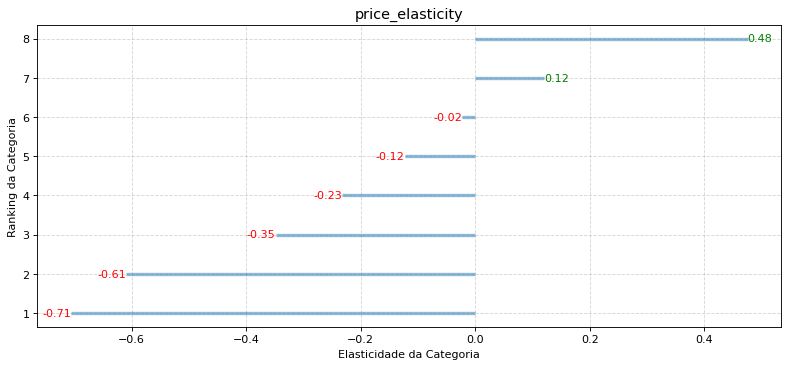

name  price_elasticity
ranking                        
8        cat5          0.475527
7        cat4          0.119727
6        cat3         -0.023249
5        cat1         -0.123360
4        cat2         -0.232026
3        cat8         -0.348078
2        cat7         -0.609234
1        cat6         -0.705415

In [60]:
pe_plot = divergent_plot(final_df, 'price_elasticity', 
                         'Ranking da Categoria', 'Elasticidade da Categoria')

In [67]:
# Correlação entre as Vendas
df_aux = df.drop(['NROEMPRESA','UNIDADE', 'Faturamento total'] , axis=1)

for col in df_aux.columns:
    if col not in ['DATA_VENDA']:
        
        df_aux[col+' Faturamento/Mês'] = df_aux.groupby(['DATA_VENDA'])[[col]].transform('sum')
        df_aux.drop(col, axis=1, inplace=True)

df_aux = df_aux.set_index('DATA_VENDA').to_period('M').sort_index()
df_aux.drop_duplicates(inplace=True)
df_aux

CATEGORIA_1 Faturamento/Mês  CATEGORIA_2 Faturamento/Mês  CATEGORIA_3 Faturamento/Mês  CATEGORIA_4 Faturamento/Mês  CATEGORIA_5 Faturamento/Mês  CATEGORIA_6 Faturamento/Mês  CATEGORIA_7 Faturamento/Mês  CATEGORIA_8 Faturamento/Mês
DATA_VENDA                                                                                                                                                                                                                                        
2017-01                        0.000000                     0.000000                     0.000000                     0.000000                     0.000000                     0.000000                    90.228119                     0.000000
2017-01                    89287.208727                 22145.548823                  3365.290003                  3890.394435                 23190.682942                 18416.767934                 48354.589147                  2049.545881
2017-01                    90021.769636                 23640.977981                  3393.897710                  4709.471427                 24105.509210                 19549.187763                 46336.047818                  2034.181707
2017-01                    82885.906493                 22414.877027                  3489.366856                  4053.618485                 22161.773206                 19136.955301                 43013.065085                  1698.097828
2017-01                    78849.857742                 19555.800039                  3007.271534                  3807.701196                 20679.826986                 18318.295382                 41596.442978                  1847.006394
...                                 ...                          ...                          ...                          ...                          ...                          ...                          ...                          ...
2017-12                    81507.200377                 21354.057489                  3240.495405                  4475.428925                 23859.314902                 21574.911265                 44088.540011                  2434.541403
2017-12                    80134.801370                 21484.278270                  3089.611785                  4634.542746                 25771.447061                 20974.539940                 44230.633743                  2526.356052
2017-12                    90665.805809                 25769.229551                  4090.171015                  6075.215683                 32865.811329                 21637.649626                 52208.231882                  3146.964321
2017-12                   125332.164414                 37425.479260                  5858.291199                  8545.332405                 47579.804522                 23484.103662                 73244.265457                  4870.586035
2017-12                   104348.366089                 26444.512317                  4139.618170                  6798.276737                 34715.918215                 18197.305306                 65061.591033                  4909.355460

[364 rows x 8 columns]

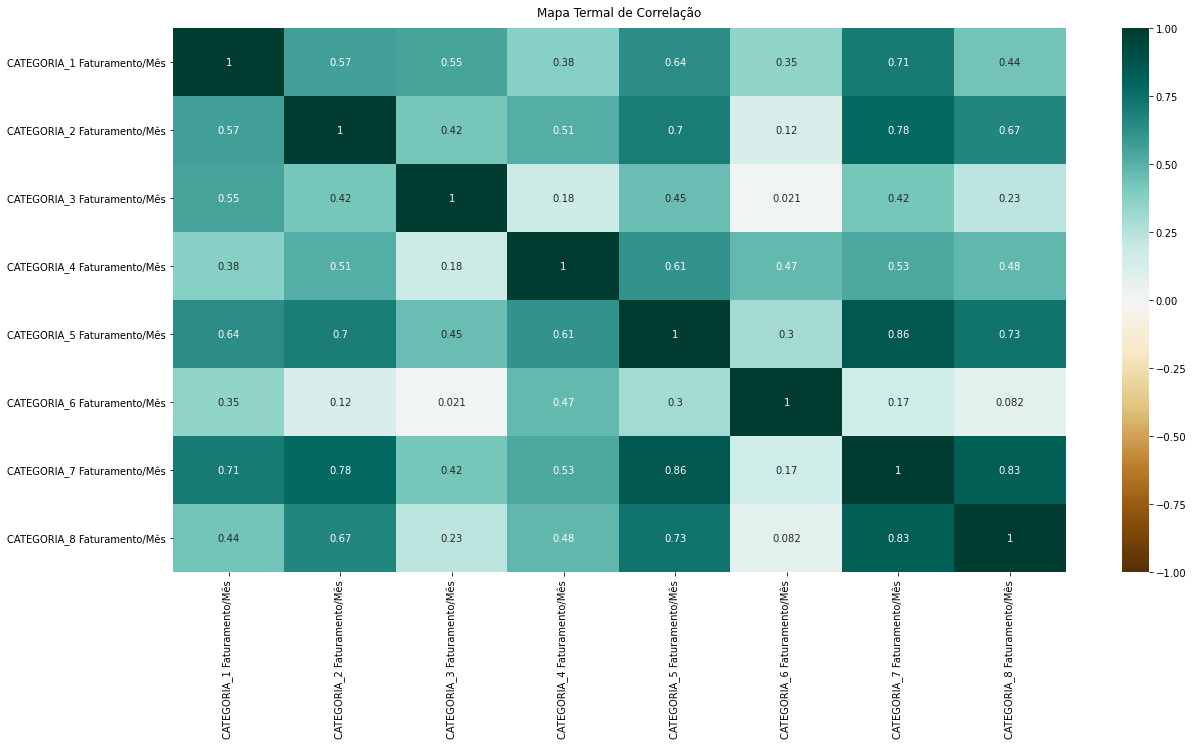

In [68]:
df_corr = df_aux.corr()

plt.figure(figsize = (20,10))
corplot = sns.heatmap(df_corr, vmin = -1, vmax = 1, annot = True, cmap='BrBG')
corplot.set_title('Mapa Termal de Correlação', fontdict={'fontsize':12}, pad=12);